# Setup

In [ ]:
from data import get_train_data
from models import RandomModel, ConstantModel, LangidModel, StatModel, StatModelOnlyIf1Language
from utils import process_unicode, inverse_dictionary, get_unicode
import os

In [ ]:
seed = 1

workspace_path = os.getcwd()
train_csv_path = os.path.join(workspace_path, 'train_submission.csv')

train_df, val_df, labels, _ = get_train_data(val_size = 0.2, random_state=seed)

validation_text_list = val_df['Text'].tolist()
validation_label_list = val_df['Label'].tolist()

# Models

In [ ]:
random_model = RandomModel(labels, seed)

correct, total = random_model.validate(val_df['Text'].tolist(), val_df['Label'].tolist())

print(correct/ total) # should be around 1/389
print((correct/ total)*389) #should be around 1

0.003483421494000774
1.355050961166301


In [ ]:
constant_model = ConstantModel(labels, "tgk")

correct, total = constant_model.validate(validation_text_list, validation_label_list)

print(correct/ total) # should be around 300/38000
print((correct/ total)*(38000/300)) #should be around 1

0.008644045929557476
1.0949124844106137


In [ ]:
langid_model = LangidModel(labels)

correct, total = langid_model.validate(validation_text_list, validation_label_list)

print(correct/ total) # should be big

In [ ]:
all_unicodes, language_unicodes = process_unicode(train_df, get_unicode)
unicode_languages = inverse_dictionary(language_unicodes)

stat_model = StatModel(labels, unicode_languages, seed)

correct, total = stat_model.validate(validation_text_list, validation_label_list)

print(correct/ total) # hopefully big

0.25687008127983485


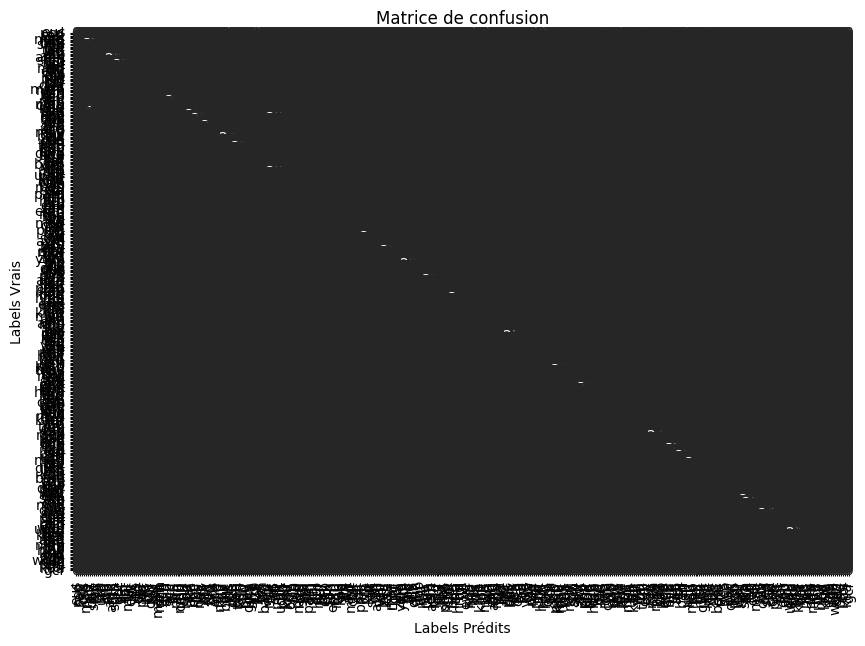

In [ ]:
all_unicodes, language_unicodes = process_unicode(train_df, get_unicode)
unicode_languages = inverse_dictionary(language_unicodes)

stat_model = StatModel(labels, unicode_languages, seed)

stat_model.generate_confusion_matrix(validation_text_list, validation_label_list)

In [ ]:
all_unicodes, language_unicodes = process_unicode(train_df, get_unicode)
unicode_languages = inverse_dictionary(language_unicodes)

stat_model = StatModelOnlyIf1Language(labels, unicode_languages)

correct, total = stat_model.validate(validation_text_list, validation_label_list)

print(correct/ total) # hopefully big

0.16036640433492452


# Pistes

In [8]:
stat_model.generate_submission()

- cld3